In [1]:
#Packages used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import pylab
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df =pd.read_csv('home_eda_with_listinginfo.csv')

In [3]:
df
#whether we need to add a tag( war and pre-war)
pd.set_option('display.max_columns',None)
df.sort_values(by=['year_built'])

,id,zip_code,price,bds,ba,sqft,sold_year,sold_month,sold_day,type,year_built,heating,cooling,parking,pets,laundry,flooring,appliances,view_city,view_mountain,view_park,view_water,most_recent_listing_date,most_recent_listing_price,sold_time,listing_sold_time_diff,price_percent_change
695,"['729', 'Greenwich', 'St', '22J']",NY 10014,537500,1.0,1.0,500.0,2020,3,6,Condo,1849.0,"Radiant, Electric",NaN,0 spaces,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,3/6/2020,no listing date,NaN
78,"['79', 'Laight', 'St', '3B']",NY 10013,4200000,3.0,3.0,2490.0,2020,4,29,Condo,1853.0,NaN,Central,0 spaces,NaN,NaN,NaN,Other interior features,0,0,1,0,10/3/2019 0:00,4450000.0,4/29/2020,209,-0.056180
827,"['142', 'Duane', 'St', 'APT', '4A']",NY 10013,2920000,2.0,2.0,2000.0,2020,1,9,Condo,1859.0,NaN,Central,0 spaces,NaN,NaN,NaN,"Appliances included: Dishwasher, Dryer, Washer",1,0,0,0,2/4/2019 0:00,3345000.0,1/9/2020,339,-0.127055
357,"['121', 'E', '38th', 'St']",NY 10016,5810000,6.0,7.0,6597.0,2020,10,22,Multiple Occupancy,1863.0,"Baseboard, Gas",Central,0 spaces,NaN,NaN,Flooring: Hardwood,"Appliances included: Dryer, Washer",1,0,0,0,1/16/2020 0:00,7000000.0,10/22/2020,280,-0.170000
369,"['204', '206', 'W', 'Houston', 'St']",NY 10014,1140000,1.0,NaN,1700.0,2020,10,16,Condo,1869.0,NaN,NaN,0 spaces,NaN,NaN,NaN,"Appliances included: Dishwasher, Dryer, Freeze...",1,0,0,0,3/20/2017 0:00,2450000.0,10/16/2020,1306,-0.534694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,"['255', 'E', '49th', 'St', 'APT', '12E']",NY 10017,1230000,2.0,2.0,1056.0,2020,3,27,Multiple Occupancy,NaN,Contact manager,Central,"None, Covered",Contact manager,Contact manager,NaN,Appliances included: Dishwasher,1,0,0,0,10/7/2019 0:00,1320000.0,3/27/2020,172,-0.068182
696,"['116', '118', 'W', '14th', 'St', '10F']",NY 10011,2950000,3.0,2.0,2090.0,2020,3,5,Condo,NaN,"None, Other",Central,On-street,NaN,NaN,NaN,"Appliances included: Dishwasher, Dryer, Freeze...",1,0,0,0,NaN,NaN,3/5/2020,no listing date,NaN
778,"['225', 'W', '10th', 'St', 'APT', '2D']",NY 10014,10,1.0,1.0,505.0,2020,1,31,Multiple Occupancy,NaN,"Other, Gas",None,None,Contact manager,Contact manager,Flooring: Hardwood,Appliances included: Dishwasher,1,0,0,0,4/30/2014 0:00,885000.0,1/31/2020,2102,-0.999989
812,"['55', 'W', '17th', 'St', '704']",NY 10011,3350000,3.0,3.0,1934.0,2020,1,15,Condo,NaN,NaN,Central,0 spaces,NaN,NaN,NaN,Other interior features,1,0,0,0,2/19/2019 0:00,3750000.0,1/15/2020,330,-0.106667


In [ ]:
# df = df.drop('state', axis =1)

In [ ]:
# df['zip_code'].unique()

In [ ]:
# df['laundry'].values

In [ ]:
df = df.drop('sold_year', axis =1)
df = df.drop('sold_month', axis =1)
df = df.drop('sold_day', axis =1)
df = df.drop('heating', axis =1)
df = df.drop('cooling', axis =1)
df = df.drop('pets', axis =1)
df = df.drop('laundry', axis =1)
df = df.drop('flooring', axis =1)
df = df.drop('sold_time', axis =1)
df = df.drop('most_recent_listing_date', axis =1)
df = df.drop('most_recent_listing_price', axis =1)
df = df.dropna()
df = df.reset_index(drop = True)

In [ ]:
df['listing_sold_time_diff']= df['listing_sold_time_diff'].astype('int')

In [ ]:
df['listing_sold_time_diff'].median()

243.0

In [ ]:
df['listing_sold_time_diff'] = df['listing_sold_time_diff'] - 243


In [ ]:
df['price'].min()

10

In [ ]:
df['price'].max()

22600000

In [ ]:
df['appliances'].unique()
#df['parking'].unique()

array(['Appliances included: Dishwasher, Dryer, Washer',
       'Appliances included: Dishwasher, Microwave, Range / Oven, Refrigerator',
       'Other interior features', 'Appliances included: Dishwasher',
       'Appliances included: Dryer, Washer',
       'Appliances included: Dishwasher, Dryer, Freezer, Microwave, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Range / Oven, Refrigerator',
       'Appliances included: Dishwasher, Dryer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Dryer, Freezer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Freezer, Microwave, Range / Oven, Refrigerator',
       'Appliances included: Dishwasher, Dryer, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Freezer, Range / Oven, Refrigerator',
       'Appliances included: Microwave, Range / Oven, Refrigerator, Washer',
     

In [ ]:
df['Garage_Attached'] = np.where('Covered' in df['parking'], 1,0)

In [ ]:
df

,id,zip_code,price,bds,ba,sqft,type,year_built,parking,appliances,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached
0,"['121', 'Morton', 'St', '2A']",NY 10014,1430000,2.0,2.0,890.0,Condo,1960.0,"On-street, Covered","Appliances included: Dishwasher, Dryer, Washer",1,0,1,1,-120,0.003509,0
1,"['152', 'W', '58th', 'St']",NY 10019,2380000,2.0,2.0,1450.0,Condo,1916.0,0 spaces,"Appliances included: Dishwasher, Dryer, Washer",1,0,1,0,-46,-0.044177,0
2,"['233', 'E', '86th', 'St']",NY 10028,1100000,1.0,1.0,57745.0,Apartment,1987.0,On-street,"Appliances included: Dishwasher, Microwave, Ra...",1,0,1,1,2263,1.315789,0
3,"['860', '5th', 'Ave']",NY 10065,275000,2.0,3.0,1700.0,Condo,1950.0,"Garage, Carport, Garage - Attached, Garage - D...","Appliances included: Dishwasher, Dryer, Washer",0,0,1,0,211,-0.921429,0
4,"['45', 'Tudor', 'City', 'Pl']",NY 10017,295000,1.0,2.0,350.0,Multiple Occupancy,1929.0,0 spaces,Other interior features,0,0,1,1,1358,-0.448598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",NY 10069,810000,1.0,1.0,675.0,Multiple Occupancy,1997.0,"Garage - Detached, Covered","Appliances included: Dishwasher, Dryer, Washer",1,0,0,0,15,-0.098999,0
480,"['1619', '3rd', 'Ave', 'APT', '24H']",NY 10128,1250000,2.0,2.0,1161.0,Condo,1975.0,0 spaces,Appliances included: Dishwasher,1,0,0,0,-71,-0.074074,0
481,"['155', 'E', '34th', 'St', 'APT', '6J']",NY 10016,615000,1.0,1.0,569.0,Condo,1961.0,"Garage - Attached, Covered",Other interior features,1,0,0,0,-106,-0.023810,0
482,"['80', 'Park', 'Ave', 'APT', '19G']",NY 10016,1400000,2.0,2.0,984.0,Condo,1956.0,0 spaces,Other interior features,1,0,0,0,-103,-0.081967,0


In [ ]:
# for (i,value) in enumerate(df['parking']):
#     if ('Garage' in value) and ('Attached' in value):
#         print(i,value)

In [ ]:
df['Garage_Attached'] = 0
df['Garage_Detached'] = 0
df['No_Garage'] = 0
df

,id,zip_code,price,bds,ba,sqft,type,year_built,parking,appliances,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage
0,"['121', 'Morton', 'St', '2A']",NY 10014,1430000,2.0,2.0,890.0,Condo,1960.0,"On-street, Covered","Appliances included: Dishwasher, Dryer, Washer",1,0,1,1,-120,0.003509,0,0,0
1,"['152', 'W', '58th', 'St']",NY 10019,2380000,2.0,2.0,1450.0,Condo,1916.0,0 spaces,"Appliances included: Dishwasher, Dryer, Washer",1,0,1,0,-46,-0.044177,0,0,0
2,"['233', 'E', '86th', 'St']",NY 10028,1100000,1.0,1.0,57745.0,Apartment,1987.0,On-street,"Appliances included: Dishwasher, Microwave, Ra...",1,0,1,1,2263,1.315789,0,0,0
3,"['860', '5th', 'Ave']",NY 10065,275000,2.0,3.0,1700.0,Condo,1950.0,"Garage, Carport, Garage - Attached, Garage - D...","Appliances included: Dishwasher, Dryer, Washer",0,0,1,0,211,-0.921429,0,0,0
4,"['45', 'Tudor', 'City', 'Pl']",NY 10017,295000,1.0,2.0,350.0,Multiple Occupancy,1929.0,0 spaces,Other interior features,0,0,1,1,1358,-0.448598,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",NY 10069,810000,1.0,1.0,675.0,Multiple Occupancy,1997.0,"Garage - Detached, Covered","Appliances included: Dishwasher, Dryer, Washer",1,0,0,0,15,-0.098999,0,0,0
480,"['1619', '3rd', 'Ave', 'APT', '24H']",NY 10128,1250000,2.0,2.0,1161.0,Condo,1975.0,0 spaces,Appliances included: Dishwasher,1,0,0,0,-71,-0.074074,0,0,0
481,"['155', 'E', '34th', 'St', 'APT', '6J']",NY 10016,615000,1.0,1.0,569.0,Condo,1961.0,"Garage - Attached, Covered",Other interior features,1,0,0,0,-106,-0.023810,0,0,0
482,"['80', 'Park', 'Ave', 'APT', '19G']",NY 10016,1400000,2.0,2.0,984.0,Condo,1956.0,0 spaces,Other interior features,1,0,0,0,-103,-0.081967,0,0,0


In [ ]:
for i in df.index:
#     if ('Garage' in value) and ('Attached' in value:
#         print(i,value)
    if ('Garage' in df['parking'].iloc[i]) and ('Attached' in df['parking'].iloc[i]):
        df['Garage_Attached'].iloc[i] = 1
    elif ('Garage' in df['parking'].iloc[i]) and ('Detached' in df['parking'].iloc[i]):
        df['Garage_Detached'].iloc[i] = 1
        
    if (df['Garage_Attached'].iloc[i] == 0) and (df['Garage_Detached'].iloc[i] == 0):
        df['No_Garage'].iloc[i] = 1
        

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['No_Garage'].sum()

372

In [ ]:
df = df.drop('parking', axis =1)

In [ ]:
df

,id,zip_code,price,bds,ba,sqft,type,year_built,appliances,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage
0,"['121', 'Morton', 'St', '2A']",NY 10014,1430000,2.0,2.0,890.0,Condo,1960.0,"Appliances included: Dishwasher, Dryer, Washer",1,0,1,1,-120,0.003509,0,0,1
1,"['152', 'W', '58th', 'St']",NY 10019,2380000,2.0,2.0,1450.0,Condo,1916.0,"Appliances included: Dishwasher, Dryer, Washer",1,0,1,0,-46,-0.044177,0,0,1
2,"['233', 'E', '86th', 'St']",NY 10028,1100000,1.0,1.0,57745.0,Apartment,1987.0,"Appliances included: Dishwasher, Microwave, Ra...",1,0,1,1,2263,1.315789,0,0,1
3,"['860', '5th', 'Ave']",NY 10065,275000,2.0,3.0,1700.0,Condo,1950.0,"Appliances included: Dishwasher, Dryer, Washer",0,0,1,0,211,-0.921429,1,0,0
4,"['45', 'Tudor', 'City', 'Pl']",NY 10017,295000,1.0,2.0,350.0,Multiple Occupancy,1929.0,Other interior features,0,0,1,1,1358,-0.448598,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",NY 10069,810000,1.0,1.0,675.0,Multiple Occupancy,1997.0,"Appliances included: Dishwasher, Dryer, Washer",1,0,0,0,15,-0.098999,0,1,0
480,"['1619', '3rd', 'Ave', 'APT', '24H']",NY 10128,1250000,2.0,2.0,1161.0,Condo,1975.0,Appliances included: Dishwasher,1,0,0,0,-71,-0.074074,0,0,1
481,"['155', 'E', '34th', 'St', 'APT', '6J']",NY 10016,615000,1.0,1.0,569.0,Condo,1961.0,Other interior features,1,0,0,0,-106,-0.023810,1,0,0
482,"['80', 'Park', 'Ave', 'APT', '19G']",NY 10016,1400000,2.0,2.0,984.0,Condo,1956.0,Other interior features,1,0,0,0,-103,-0.081967,0,0,1


In [ ]:
df['appliances'].unique()

array(['Appliances included: Dishwasher, Dryer, Washer',
       'Appliances included: Dishwasher, Microwave, Range / Oven, Refrigerator',
       'Other interior features', 'Appliances included: Dishwasher',
       'Appliances included: Dryer, Washer',
       'Appliances included: Dishwasher, Dryer, Freezer, Microwave, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Range / Oven, Refrigerator',
       'Appliances included: Dishwasher, Dryer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Dryer, Freezer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Freezer, Microwave, Range / Oven, Refrigerator',
       'Appliances included: Dishwasher, Dryer, Range / Oven, Refrigerator, Washer',
       'Appliances included: Dishwasher, Freezer, Range / Oven, Refrigerator',
       'Appliances included: Microwave, Range / Oven, Refrigerator, Washer',
     

In [ ]:
df['Dishwasher'] = 0
df['laundry'] = 0
df['Microwave'] = 0
df['Oven'] = 0
df['Refrigerator'] = 0
df['Garbage disposal'] = 0



In [ ]:
for i in df.index:
#     if ('Garage' in value) and ('Attached' in value:
#         print(i,value)
    if ('Dishwasher' in df['appliances'].iloc[i]):
        df['Dishwasher'].iloc[i] = 1
    if ('Dryer' in df['appliances'].iloc[i]) or ('Washer' in df['appliances'].iloc[i]):
        df['laundry'].iloc[i] = 1
    if ('Microwave' in df['appliances'].iloc[i]):
        df['Microwave'].iloc[i] = 1
    if ('Oven' in df['appliances'].iloc[i]) or ('Oven' in df['appliances'].iloc[i]):
        df['Oven'].iloc[i] = 1
    if ('Freezer' in df['appliances'].iloc[i]) or ('Refrigerator' in df['appliances'].iloc[i]):
        df['Refrigerator'].iloc[i] = 1
    if ('Garbage disposal' in df['appliances'].iloc[i]):
        df['Garbage disposal'].iloc[i] = 1
        

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df

,id,zip_code,price,bds,ba,sqft,type,year_built,appliances,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage,Dishwasher,laundry,Microwave,Oven,Refrigerator,Garbage disposal
0,"['121', 'Morton', 'St', '2A']",NY 10014,1430000,2.0,2.0,890.0,Condo,1960.0,"Appliances included: Dishwasher, Dryer, Washer",1,0,1,1,-120,0.003509,0,0,1,1,1,0,0,0,0
1,"['152', 'W', '58th', 'St']",NY 10019,2380000,2.0,2.0,1450.0,Condo,1916.0,"Appliances included: Dishwasher, Dryer, Washer",1,0,1,0,-46,-0.044177,0,0,1,1,1,0,0,0,0
2,"['233', 'E', '86th', 'St']",NY 10028,1100000,1.0,1.0,57745.0,Apartment,1987.0,"Appliances included: Dishwasher, Microwave, Ra...",1,0,1,1,2263,1.315789,0,0,1,1,0,1,1,1,0
3,"['860', '5th', 'Ave']",NY 10065,275000,2.0,3.0,1700.0,Condo,1950.0,"Appliances included: Dishwasher, Dryer, Washer",0,0,1,0,211,-0.921429,1,0,0,1,1,0,0,0,0
4,"['45', 'Tudor', 'City', 'Pl']",NY 10017,295000,1.0,2.0,350.0,Multiple Occupancy,1929.0,Other interior features,0,0,1,1,1358,-0.448598,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",NY 10069,810000,1.0,1.0,675.0,Multiple Occupancy,1997.0,"Appliances included: Dishwasher, Dryer, Washer",1,0,0,0,15,-0.098999,0,1,0,1,1,0,0,0,0
480,"['1619', '3rd', 'Ave', 'APT', '24H']",NY 10128,1250000,2.0,2.0,1161.0,Condo,1975.0,Appliances included: Dishwasher,1,0,0,0,-71,-0.074074,0,0,1,1,0,0,0,0,0
481,"['155', 'E', '34th', 'St', 'APT', '6J']",NY 10016,615000,1.0,1.0,569.0,Condo,1961.0,Other interior features,1,0,0,0,-106,-0.023810,1,0,0,0,0,0,0,0,0
482,"['80', 'Park', 'Ave', 'APT', '19G']",NY 10016,1400000,2.0,2.0,984.0,Condo,1956.0,Other interior features,1,0,0,0,-103,-0.081967,0,0,1,0,0,0,0,0,0


In [ ]:
df =df.drop('appliances', axis =1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Use one hot encoder
encoder = LabelEncoder()
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels =  len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n),coded_array] = 1
    return one_hot

In [ ]:
col_zip = sorted(df['zip_code'].unique())
zipcode = pd.DataFrame(one_hot_encoder(df['zip_code']), columns = col_zip)

col_type = sorted(df['type'].unique())
apt_type = pd.DataFrame(one_hot_encoder(df['type']), columns = col_type)


In [ ]:
df_z = pd.concat([df,zipcode,apt_type],axis =1)
df_z

,id,zip_code,price,bds,ba,sqft,type,year_built,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage,Dishwasher,laundry,Microwave,Oven,Refrigerator,Garbage disposal,NY 10001,NY 10002,NY 10003,NY 10004,NY 10005,NY 10006,NY 10007,NY 10009,NY 10010,NY 10011,NY 10012,NY 10013,NY 10014,NY 10016,NY 10017,NY 10018,NY 10019,NY 10021,NY 10022,NY 10023,NY 10024,NY 10025,NY 10026,NY 10027,NY 10028,NY 10029,NY 10030,NY 10031,NY 10033,NY 10034,NY 10036,NY 10037,NY 10038,NY 10039,NY 10040,NY 10044,NY 10065,NY 10069,NY 10075,NY 10128,NY 10280,NY 10282,Apartment,Condo,Cooperative,Multiple Occupancy,Single Family,Townhouse
0,"['121', 'Morton', 'St', '2A']",NY 10014,1430000,2.0,2.0,890.0,Condo,1960.0,1,0,1,1,-120,0.003509,0,0,1,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,"['152', 'W', '58th', 'St']",NY 10019,2380000,2.0,2.0,1450.0,Condo,1916.0,1,0,1,0,-46,-0.044177,0,0,1,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"['233', 'E', '86th', 'St']",NY 10028,1100000,1.0,1.0,57745.0,Apartment,1987.0,1,0,1,1,2263,1.315789,0,0,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"['860', '5th', 'Ave']",NY 10065,275000,2.0,3.0,1700.0,Condo,1950.0,0,0,1,0,211,-0.921429,1,0,0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"['45', 'Tudor', 'City', 'Pl']",NY 10017,295000,1.0,2.0,350.0,Multiple Occupancy,1929.0,0,0,1,1,1358,-0.448598,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",NY 10069,810000,1.0,1.0,675.0,Multiple Occupancy,1997.0,1,0,0,0,15,-0.098999,0,1,0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
480,"['1619', '3rd', 'Ave', 'APT', '24H']",NY 10128,1250000,2.0,2.0,1161.0,Condo,1975.0,1,0,0,0,-71,-0.074074,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
481,"['155', 'E', '34th', 'St', 'APT', '6J']",NY 10016,615000,1.0,1.0,569.0,Condo,1961.0,1,0,0,0,-106,-0.023810,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
482,"['80', 'Park', 'Ave', 'APT', '19G']",NY 10016,1400000,2.0,2.0,984.0,Condo,1956.0,1,0,0,0,-103,-0.081967,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
colname = list()
colname.extend(col_zip)
colname.extend(col_type)
data = df_z[colname]
from sklearn.decomposition import PCA
N_COMPONENTS = 2
pca_model = PCA(n_components = N_COMPONENTS)
pc_matrix = pca_model.fit_transform(data)

In [ ]:
pc_matrix

array([[-0.12523017, -0.01404932],
       [-0.09178293, -0.03113973],
       [ 0.73362049, -0.10189018],
       [-0.06461158, -0.047402  ],
       [ 1.2584309 , -0.0889824 ],
       [-0.10081039, -0.04054427],
       [-0.10094004, -0.0140327 ],
       [-0.09178293, -0.03113973],
       [-0.1182575 , -0.07412342],
       [-0.07214596,  0.86965265],
       [-0.10444075, -0.01496065],
       [-0.07214596,  0.86965265],
       [-0.13446912, -0.01442918],
       [-0.12523017, -0.01404932],
       [-0.11767308, -0.02091454],
       [-0.07214596,  0.86965265],
       [ 1.30102126,  0.79254101],
       [-0.12540894, -0.0232274 ],
       [-0.12909545, -0.00843315],
       [-0.1182575 , -0.07412342],
       [-0.14504207, -0.01045171],
       [-0.07214596,  0.86965265],
       [-0.09178293, -0.03113973],
       [-0.13774965, -0.0094793 ],
       [ 0.71876031, -0.08467134],
       [-0.12709918, -0.00820672],
       [ 1.25490972, -0.15123506],
       [-0.07214596,  0.86965265],
       [-0.12523017,

In [ ]:
df_PCA = pd.DataFrame(pc_matrix, columns = ['PCA1','PCA2'])
df = pd.concat([df,df_PCA], axis =1)

In [ ]:
df

,id,zip_code,price,bds,ba,sqft,type,year_built,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage,Dishwasher,laundry,Microwave,Oven,Refrigerator,Garbage disposal,PCA1,PCA2
0,"['121', 'Morton', 'St', '2A']",NY 10014,1430000,2.0,2.0,890.0,Condo,1960.0,1,0,1,1,-120,0.003509,0,0,1,1,1,0,0,0,0,-0.125230,-0.014049
1,"['152', 'W', '58th', 'St']",NY 10019,2380000,2.0,2.0,1450.0,Condo,1916.0,1,0,1,0,-46,-0.044177,0,0,1,1,1,0,0,0,0,-0.091783,-0.031140
2,"['233', 'E', '86th', 'St']",NY 10028,1100000,1.0,1.0,57745.0,Apartment,1987.0,1,0,1,1,2263,1.315789,0,0,1,1,0,1,1,1,0,0.733620,-0.101890
3,"['860', '5th', 'Ave']",NY 10065,275000,2.0,3.0,1700.0,Condo,1950.0,0,0,1,0,211,-0.921429,1,0,0,1,1,0,0,0,0,-0.064612,-0.047402
4,"['45', 'Tudor', 'City', 'Pl']",NY 10017,295000,1.0,2.0,350.0,Multiple Occupancy,1929.0,0,0,1,1,1358,-0.448598,0,0,1,0,0,0,0,0,0,1.258431,-0.088982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",NY 10069,810000,1.0,1.0,675.0,Multiple Occupancy,1997.0,1,0,0,0,15,-0.098999,0,1,0,1,1,0,0,0,0,1.245604,-0.091696
480,"['1619', '3rd', 'Ave', 'APT', '24H']",NY 10128,1250000,2.0,2.0,1161.0,Condo,1975.0,1,0,0,0,-71,-0.074074,0,0,1,1,0,0,0,0,0,-0.125409,-0.023227
481,"['155', 'E', '34th', 'St', 'APT', '6J']",NY 10016,615000,1.0,1.0,569.0,Condo,1961.0,1,0,0,0,-106,-0.023810,1,0,0,0,0,0,0,0,0,-0.160077,-0.452583
482,"['80', 'Park', 'Ave', 'APT', '19G']",NY 10016,1400000,2.0,2.0,984.0,Condo,1956.0,1,0,0,0,-103,-0.081967,0,0,1,0,0,0,0,0,0,-0.160077,-0.452583


In [ ]:
df = df.drop('zip_code', axis =1)
df = df.drop('type', axis = 1)

In [ ]:
df

,id,price,bds,ba,sqft,year_built,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage,Dishwasher,laundry,Microwave,Oven,Refrigerator,Garbage disposal,PCA1,PCA2
0,"['121', 'Morton', 'St', '2A']",1430000,2.0,2.0,890.0,1960.0,1,0,1,1,-120,0.003509,0,0,1,1,1,0,0,0,0,-0.125230,-0.014049
1,"['152', 'W', '58th', 'St']",2380000,2.0,2.0,1450.0,1916.0,1,0,1,0,-46,-0.044177,0,0,1,1,1,0,0,0,0,-0.091783,-0.031140
2,"['233', 'E', '86th', 'St']",1100000,1.0,1.0,57745.0,1987.0,1,0,1,1,2263,1.315789,0,0,1,1,0,1,1,1,0,0.733620,-0.101890
3,"['860', '5th', 'Ave']",275000,2.0,3.0,1700.0,1950.0,0,0,1,0,211,-0.921429,1,0,0,1,1,0,0,0,0,-0.064612,-0.047402
4,"['45', 'Tudor', 'City', 'Pl']",295000,1.0,2.0,350.0,1929.0,0,0,1,1,1358,-0.448598,0,0,1,0,0,0,0,0,0,1.258431,-0.088982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,"['200', 'Riverside', 'Blvd', 'APT', '408']",810000,1.0,1.0,675.0,1997.0,1,0,0,0,15,-0.098999,0,1,0,1,1,0,0,0,0,1.245604,-0.091696
480,"['1619', '3rd', 'Ave', 'APT', '24H']",1250000,2.0,2.0,1161.0,1975.0,1,0,0,0,-71,-0.074074,0,0,1,1,0,0,0,0,0,-0.125409,-0.023227
481,"['155', 'E', '34th', 'St', 'APT', '6J']",615000,1.0,1.0,569.0,1961.0,1,0,0,0,-106,-0.023810,1,0,0,0,0,0,0,0,0,-0.160077,-0.452583
482,"['80', 'Park', 'Ave', 'APT', '19G']",1400000,2.0,2.0,984.0,1956.0,1,0,0,0,-103,-0.081967,0,0,1,0,0,0,0,0,0,-0.160077,-0.452583


In [ ]:
# df['type'].unique()

In [ ]:
# df['laundry'].values
df.corr()

,price,bds,ba,sqft,year_built,view_city,view_mountain,view_park,view_water,listing_sold_time_diff,price_percent_change,Garage_Attached,Garage_Detached,No_Garage,Dishwasher,laundry,Microwave,Oven,Refrigerator,Garbage disposal,PCA1,PCA2
price,1.000000,0.568153,0.691504,-0.029411,0.028387,-0.082292,-0.030405,0.146500,0.009435,0.012585,-0.031025,-0.068478,0.029404,0.049833,-0.122524,0.114528,-0.083308,-0.093919,-0.100890,0.005078,-1.381785e-02,2.719780e-02
bds,0.568153,1.000000,0.805510,0.018358,-0.089808,-0.009120,0.004907,0.102436,-0.008082,0.023136,-0.083846,-0.016470,0.022392,0.004755,-0.089917,0.139421,-0.054884,-0.055941,-0.060319,0.047257,3.788935e-02,-2.037006e-03
ba,0.691504,0.805510,1.000000,0.021219,-0.036719,-0.094600,-0.041953,0.148218,0.036581,0.058942,-0.090227,-0.010964,0.049850,-0.013325,-0.077218,0.172454,-0.078714,-0.088553,-0.098147,0.068634,2.162649e-02,-2.482495e-02
sqft,-0.029411,0.018358,0.021219,1.000000,-0.067848,-0.047737,-0.008041,0.020848,0.008192,0.083826,-0.058514,0.000079,-0.034418,0.016170,0.087000,-0.031355,0.085784,0.054901,0.064970,0.019479,-3.573185e-02,1.869046e-01
year_built,0.028387,-0.089808,-0.036719,-0.067848,1.000000,-0.006467,0.006256,-0.031168,0.199066,-0.113572,-0.083247,0.232708,0.069016,-0.249077,-0.060540,0.015382,-0.068609,-0.091155,-0.091060,-0.014480,-4.749775e-02,-2.706181e-02
view_city,-0.082292,-0.009120,-0.094600,-0.047737,-0.006467,1.000000,-0.121053,-0.351030,-0.331713,-0.095638,0.090093,-0.058904,-0.023892,0.066078,-0.026202,0.030859,0.050582,0.017961,0.021596,0.048527,4.344885e-02,2.051842e-02
view_mountain,-0.030405,0.004907,-0.041953,-0.008041,0.006256,-0.121053,1.000000,-0.020248,-0.024095,-0.024782,0.015528,-0.022043,-0.009447,0.024967,-0.043659,-0.029905,-0.017117,-0.019021,-0.019331,-0.006609,-1.546675e-02,-1.294987e-03
view_park,0.146500,0.102436,0.148218,0.020848,-0.031168,-0.351030,-0.020248,1.000000,0.033346,0.107539,-0.020738,0.011248,0.019401,-0.019621,0.051807,-0.001603,0.018274,0.032813,0.027336,0.013573,-5.308366e-02,1.243457e-01
view_water,0.009435,-0.008082,0.036581,0.008192,0.199066,-0.331713,-0.024095,0.033346,1.000000,0.034207,-0.013331,0.074500,0.065758,-0.100347,0.001901,-0.021499,0.043349,0.059404,0.052658,0.063565,-6.116226e-02,-3.050898e-02
listing_sold_time_diff,0.012585,0.023136,0.058942,0.083826,-0.113572,-0.095638,-0.024782,0.107539,0.034207,1.000000,0.137330,0.018191,0.058879,-0.044713,0.024193,0.054804,0.119767,0.057311,0.079451,0.064302,1.033896e-01,-6.456233e-03


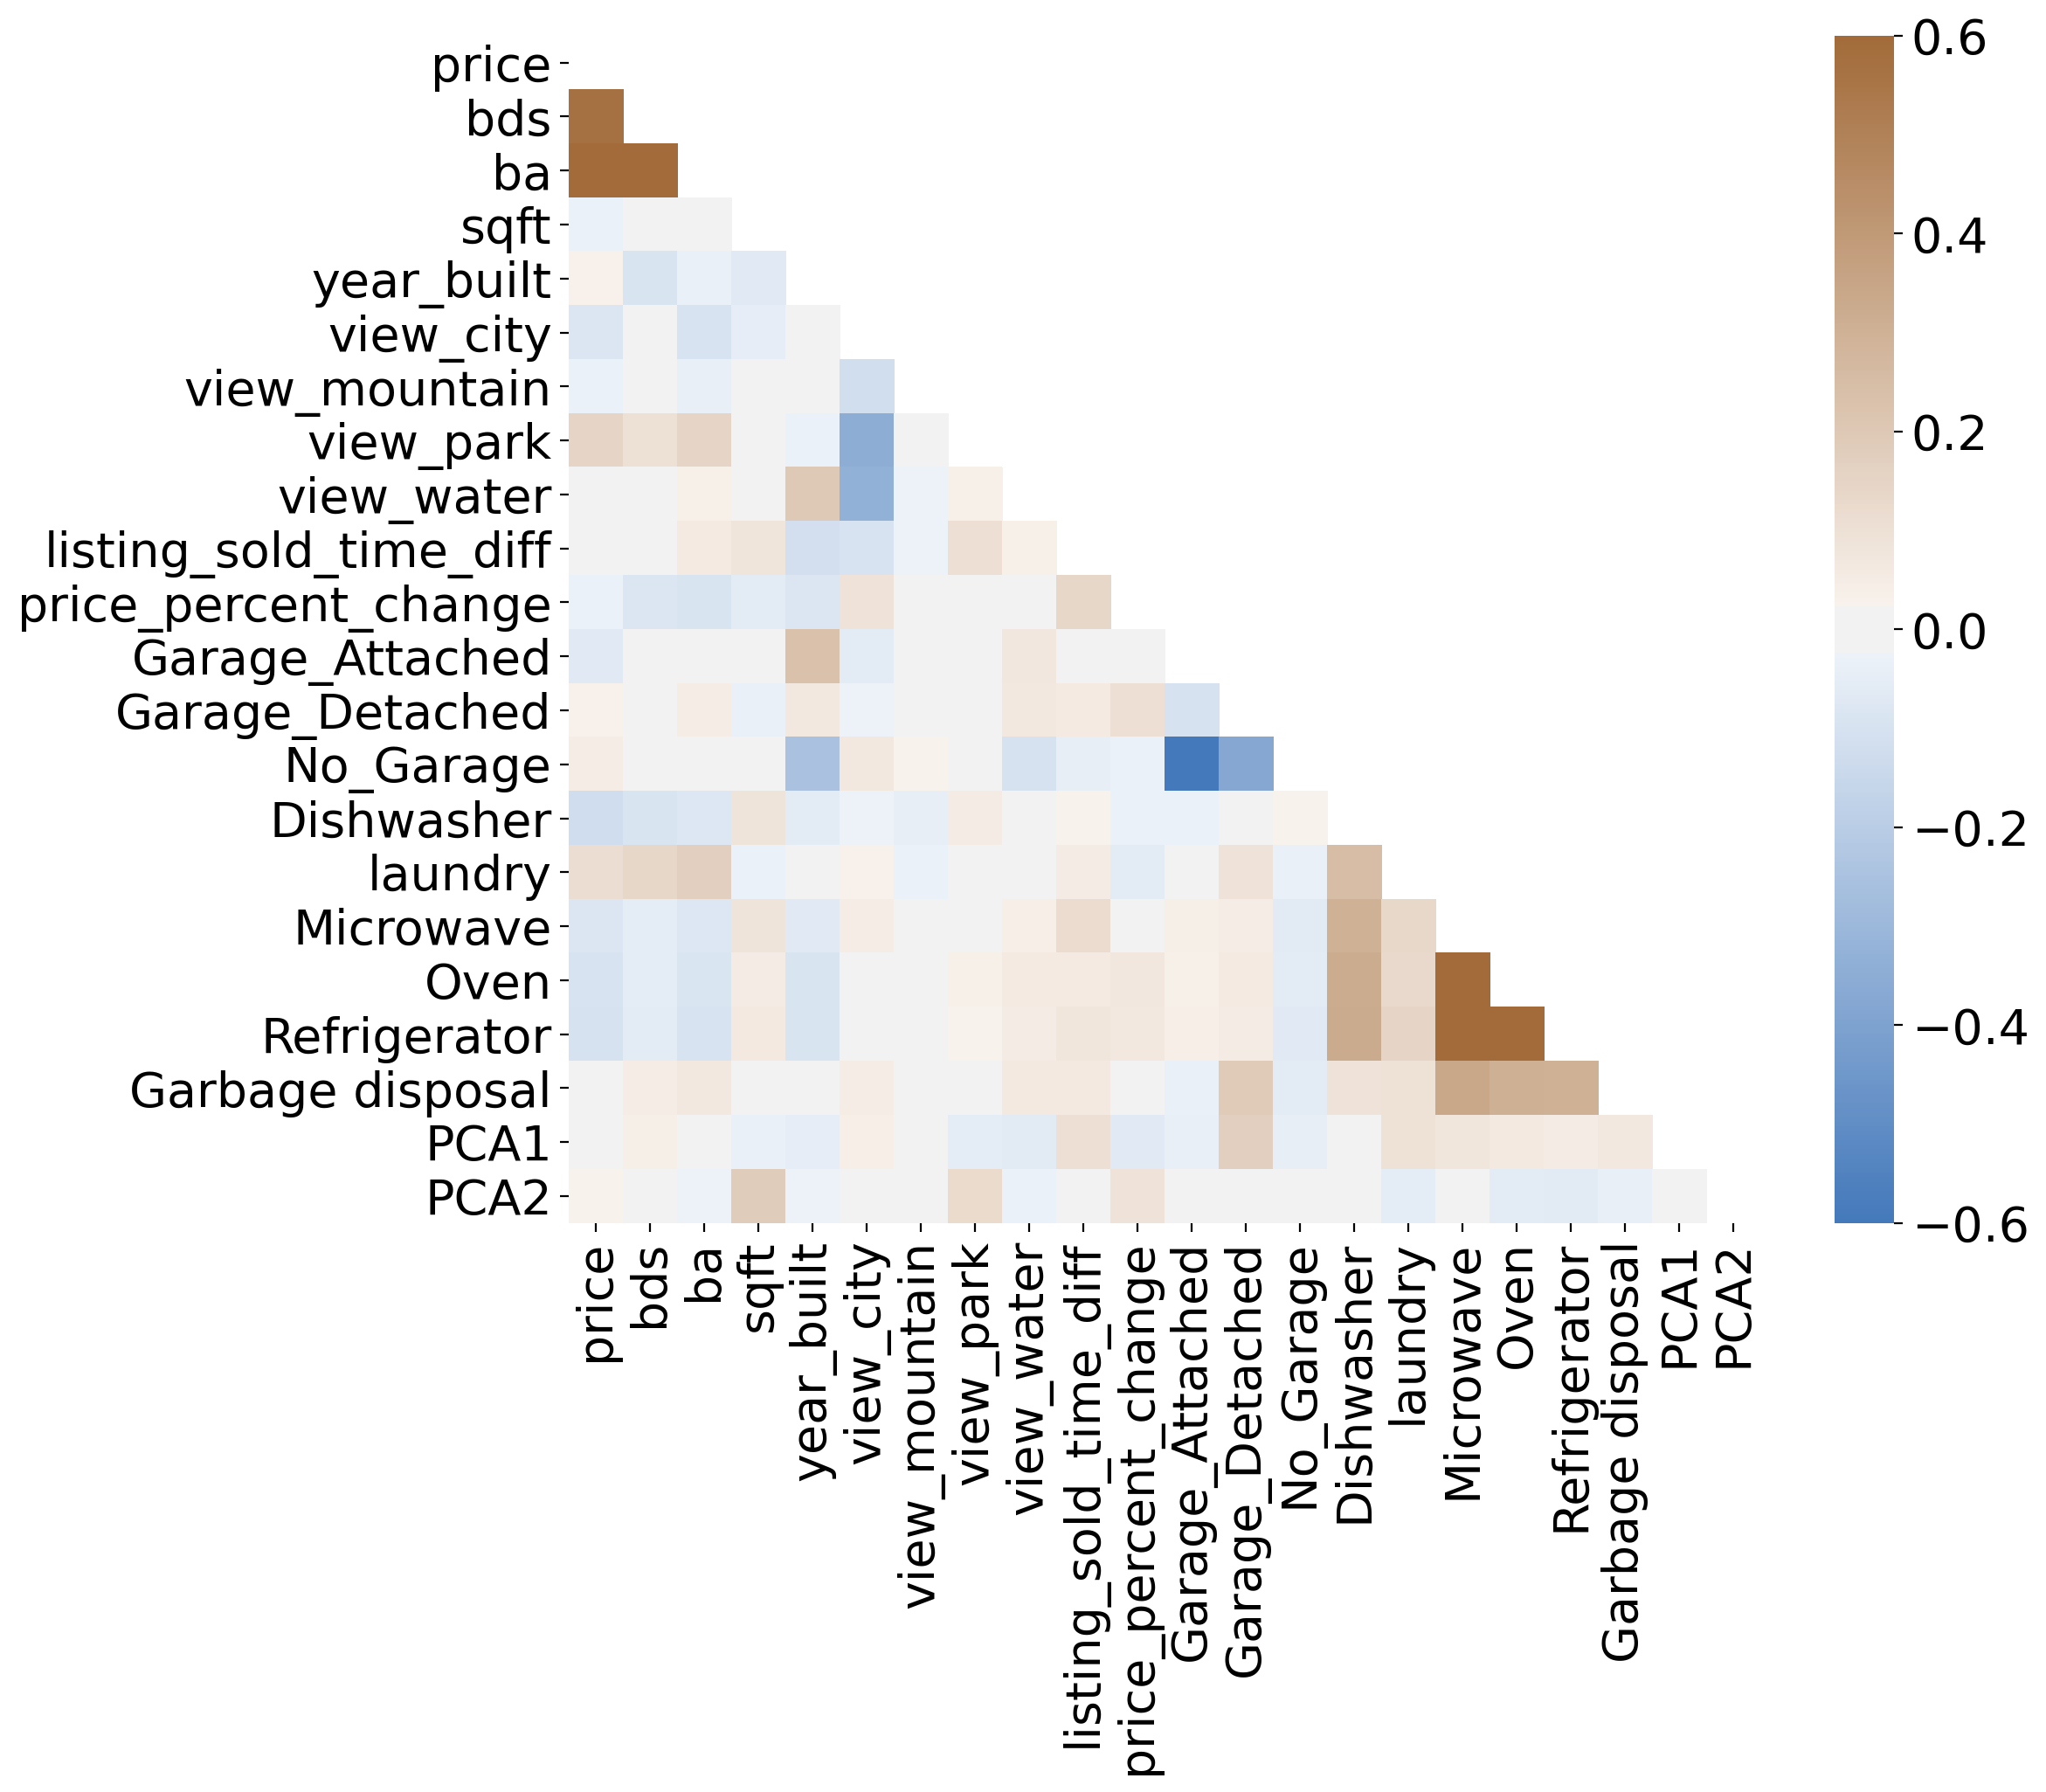

In [ ]:
%matplotlib inline
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
corr = df.corr()
fig, ax = plt.subplots(figsize = (11,9), dpi = 200) #change picture resolution and figure size
cor_mask = np.triu(np.ones(corr.shape)).astype(np.bool)

#use heatmap feature to plot the correlation
ax =  sns.heatmap(corr, vmin = -0.6, vmax = 0.6, mask = cor_mask, cmap = sns.diverging_palette(250, 40, as_cmap = True))

<h1>Modeling</h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
train, test = train_test_split(df,test_size = 0.3)
x_train = train.iloc[0:,2:]
y_train = train[['price']]
x_test = test.iloc[0:,2:]
y_test =test[['price']]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=10)
#model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# mse_dt = MSE(y_test, y_pred)
# rmse_dt = mse_dt**(1/2)
# print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
# # Test set RMSE of dt: 4.37

In [ ]:
import sklearn
import math
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

print(rmse)

1100949.7501534272


In [ ]:
2000499.8147890056/22599990

0.08851773008700471

In [ ]:
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.9940286404669658
Testing R-Square 0.4792015176721188


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,30,50),
    'max_depth':(4,5,6,8,10,15),
    'min_samples_split': (2,4,8),
    'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestRegressor(), parameters, cv = 3, iid = False)
model.fit(x_train, np.ravel(y_train))
model.best_score_,model.best_params_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


(0.5506230533409143,
 {'max_depth': 8,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 10})

In [ ]:
#put the parameter into the random forest model
rfmodel = RandomForestRegressor(max_depth =8,min_samples_leaf =4 , min_samples_split =4 , n_estimators = 10)
rfmodel.fit(x_train, np.ravel(y_train))

# #print the confusion matrix for the random forest model
# from sklearn.metrics import confusion_matrix
# y_pred= rfmodel.predict(x_test)
# cfm = confusion_matrix(np.ravel(y_test),y_pred)
# cfm
print("Training R-Square",rfmodel.score(x_train,y_train))
print("Testing R-Square",rfmodel.score(x_test,y_test))

Training R-Square 0.7936131728203083
Testing R-Square 0.6795107677540375


In [ ]:
rfmodel.fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
# Test set RMSE of dt: 4.37

Test set RMSE of dt: 909465.00


<ipython-input-58-d36687665406>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(x_train, y_train)


In [ ]:
rf_auc = rfmodel.score(x_test,y_test)
rf_auc

0.6446087778901621

In [ ]:
feature_names = [key for key in df if not key == 'price']

Text(0.5, 0, 'Relative Importance')

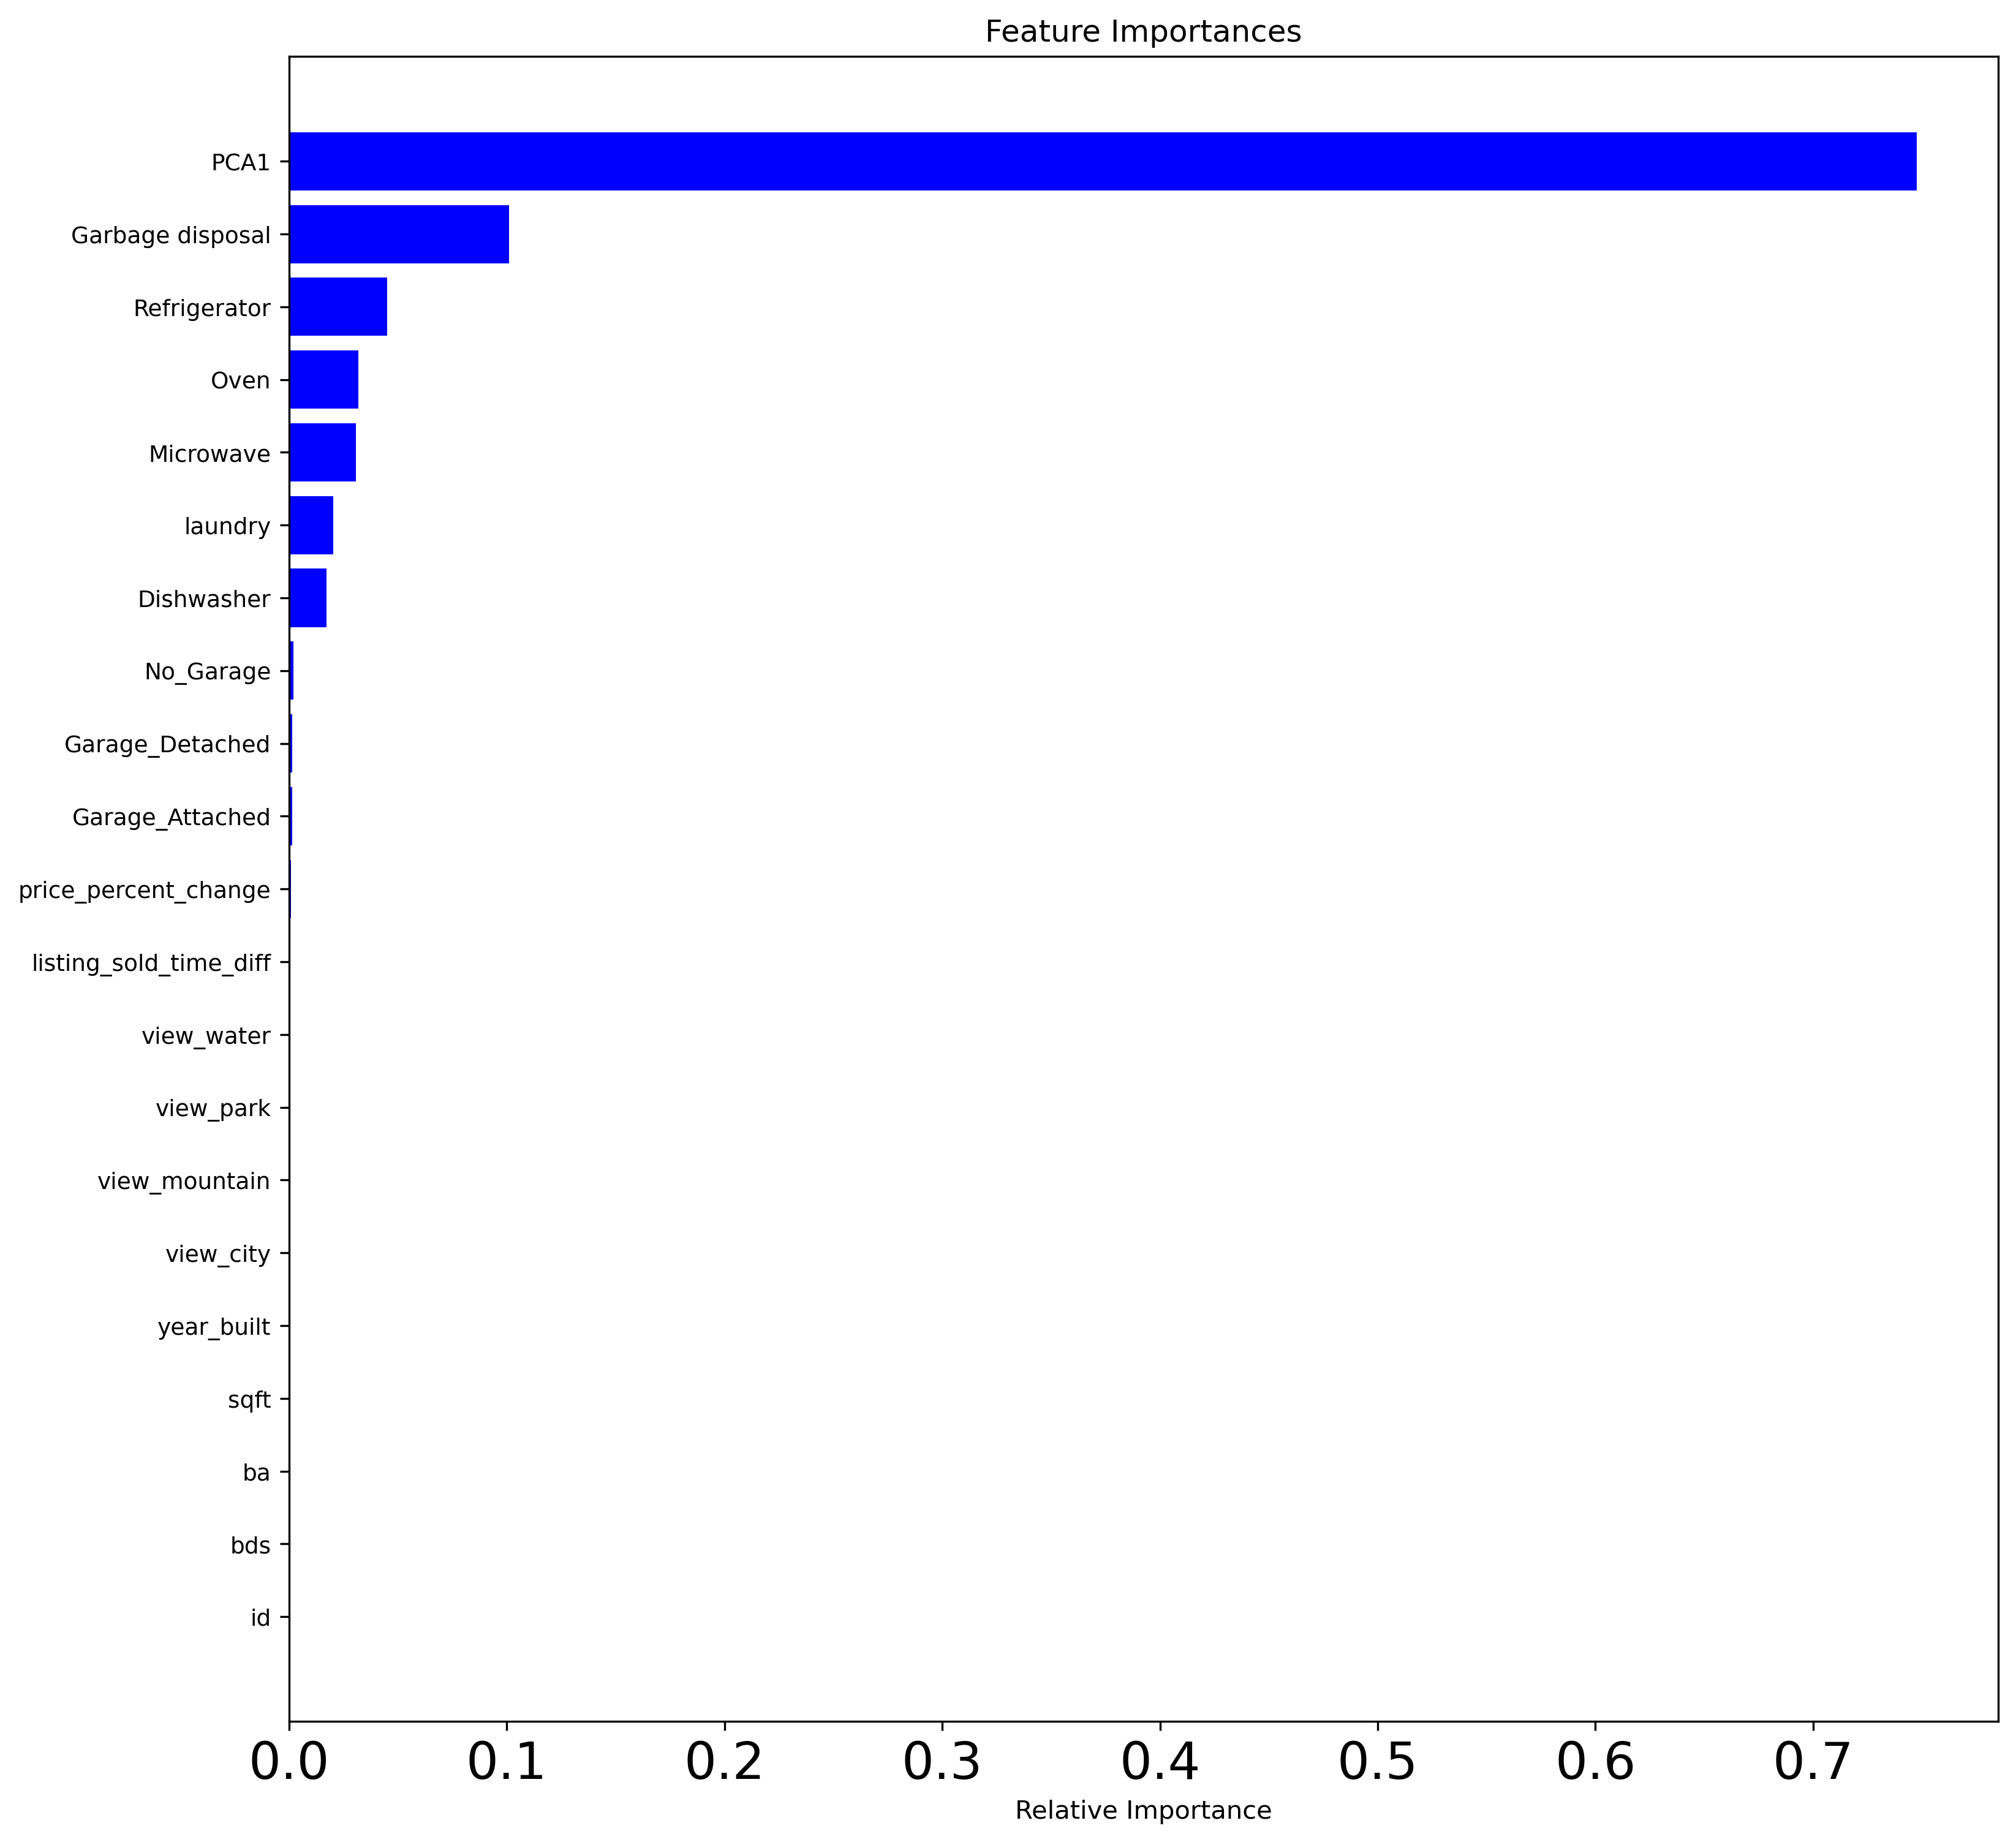

In [ ]:
#visualize the feature importance in the random forest model
import matplotlib.pyplot as plt
%matplotlib inline
importances = rfmodel.feature_importances_
indices = np.argsort(importances)
plt.rc('ytick', labelsize=9)
plt.figure(figsize=(12,12),dpi=300)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [ ]:
# from sklearn.metrics import roc_curve,auc
# import matplotlib.pyplot as plt
# %matplotlib inline


# testing_predictions = rfmodel.predict(x_test)
# (fpr,tpr,thresholds) =  roc_curve(y_test,testing_predictions)

# area = auc(fpr,tpr)
# plt.clf()
# plt.plot(fpr,tpr,label ="Out-Sample ROC Curve with area = %1.2f"%area)

# plt.plot([0,1],[0,1],'k')
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve for Random Forest Model')
# plt.legend(loc = 'lower right')
# plt.show()

Text(0.5, 0, 'Relative Importance')

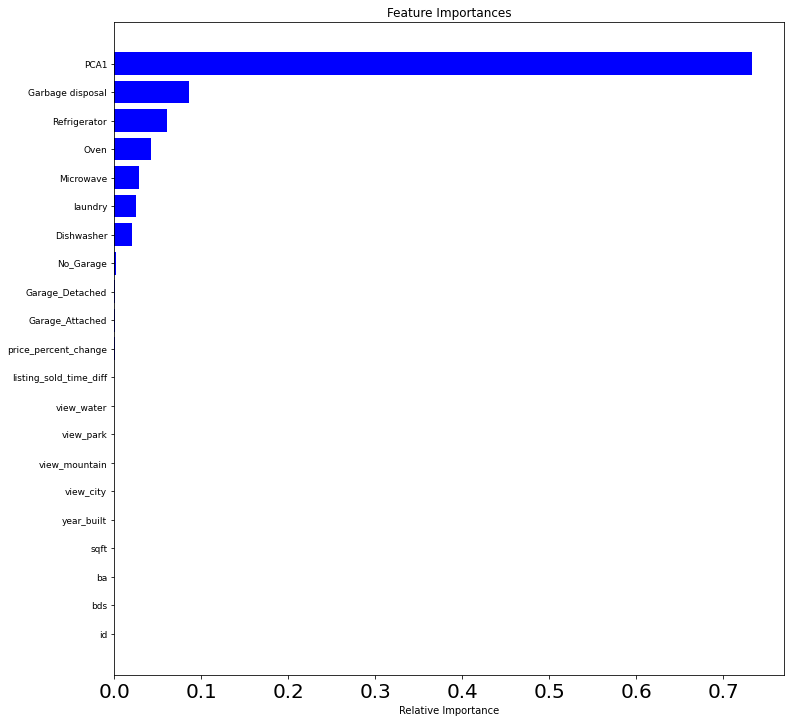

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = rfmodel.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [ ]:
from sklearn import linear_model
lmodel = linear_model.LinearRegression()
lmodel.fit(x_train,y_train)
predictions = lmodel.predict(x_test)
actuals = np.array(y_test)
linear_acc = lmodel.score(x_test,actuals)
print(linear_acc)

0.4301365716781931


In [ ]:
print("Training R-Square",lmodel.score(x_train,y_train))
print("Testing R-Square",lmodel.score(x_test,y_test))

Training R-Square 0.5023503158043139
Testing R-Square 0.4301365716781931
